# Project: Investigating IMDB Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report involves data analysis of the imdb database. The purpose of the analysis performed in this report is to find any strong correlations between a movie's budget and its average rating and popularity. Any movies with movie budgets of zero have been excluded from the analysis.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [80]:
df = pd.read_csv('tmdb-movies.csv')
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3115,16350,tt1029241,0.374561,0,0,Vinyan,Rufus Sewell|Emmanuelle BÃ©art|Julie Dreyfus|J...,NaN,Fabrice Du Welz,NaN,...,A couple leaves the civilized world behind and...,96,Drama|Horror|Thriller,The Film,8/30/08,13,4.4,2008,0.000000e+00,0.000000e+00
10489,6978,tt0090728,0.960984,25000000,11000000,Big Trouble in Little China,Kurt Russell|Kim Cattrall|Dennis Dun|James Hon...,http://www.theofficialjohncarpenter.com/big-tr...,John Carpenter,Adventure doesn't come any bigger!,...,When trucker Jack Burton agreed to take his fr...,99,Adventure|Fantasy|Action|Comedy,Twentieth Century Fox Film Corporation|TAFT En...,5/30/86,347,6.7,1986,4.973516e+07,2.188347e+07
9668,27786,tt0094033,0.288138,0,0,Steel Dawn,Patrick Swayze|Lisa Niemi|Anthony Zerbe|Christ...,NaN,Lance Hool,"he is the desert warrior, carving the future w...",...,"In a post-apocalyptic world, a warrior wanderi...",97,Action|Adventure|Science Fiction,Vestron Pictures,11/6/87,17,4.4,1987,0.000000e+00,0.000000e+00
4297,19819,tt0109305,0.171867,0,0,Blue Chips,Nick Nolte|Shaquille O'Neal|Mary McDonnell|J. ...,NaN,William Friedkin,NaN,...,"Pete Bell, a college basketball coach is under...",108,Drama,Paramount Pictures,2/18/94,20,5.7,1994,0.000000e+00,0.000000e+00
8363,2470,tt0103791,0.128025,0,0,Belle Ã‰poque,PenÃ©lope Cruz|Gabino Diego|Ariadna Gil|Fernan...,NaN,Fernando Trueba,"A sexy, lusty uninhibited comedy.",...,"In 1931, a young soldier deserts from the army...",109,Comedy|Drama|Foreign|Romance,Sogepaq|AnimatÃ³grafo|Fernando Trueba Producci...,12/4/92,13,6.9,1992,0.000000e+00,0.000000e+00


### Taking a view of all the columns available in dataset and the corresponding data types


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Cleaning

### Dropping uncessary columns from the data set

In [82]:
df.drop(['imdb_id', 'release_year', 'runtime', 'revenue', 'cast', 'homepage',
         'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies',
         'release_date', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

### Checking to see if there is any missing relevant data or null values

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
original_title    10866 non-null object
vote_average      10866 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 424.5+ KB


### Checking to see if any movies have a budget of zero

In [84]:
df.query('budget == {}'.format(0)).count()

id                5696
popularity        5696
budget            5696
original_title    5696
vote_average      5696
dtype: int64

### Removing movies with a budget of zero

In [85]:
df = df[df['budget'] != 0]

### Repeating the previous 2 steps for popularity

In [86]:
df[df['vote_average'] != 0].shape

(5170, 5)

In [87]:
df[df['popularity'] == 0].shape

(0, 5)

### Altering the budget column to units of thousand for easier reading.

In [88]:
df['budget'] = df['budget']/1000
df.rename(index=str, columns={'budget':'budget_k'}, inplace=True)

### All columns in the data set now have the same number of rows.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5170 entries, 0 to 10865
Data columns (total 5 columns):
id                5170 non-null int64
popularity        5170 non-null float64
budget_k          5170 non-null float64
original_title    5170 non-null object
vote_average      5170 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 242.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Do higher budget movies tend to have higher average movie ratings?


### A simple scatter plot shows a low resolution view indicating that there is an insignificant increase in average rating ('vote_average') as movie budget increases.¶


Text(0.5,1,'Budget vs Vote Average')

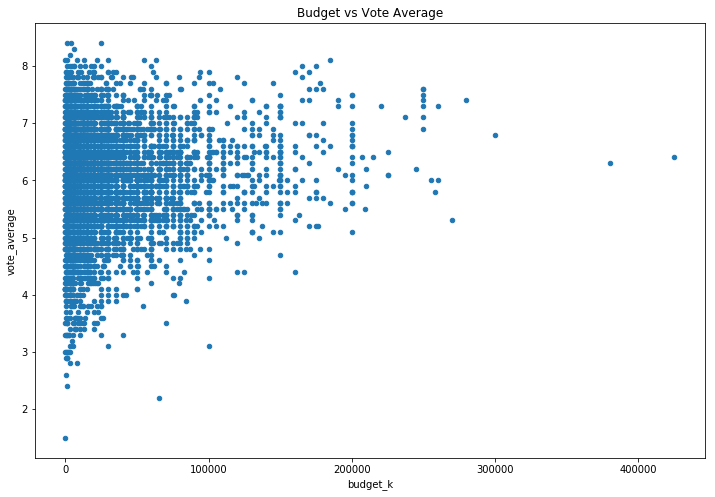

In [90]:
df.plot.scatter(x='budget_k', y='vote_average')
plt.title('Budget vs Vote Average')

Further, more in-depth analysis was conducted to take a closer look at changes of mean movie ratings across different movie budgets. All movies were serperated into four different groups; very_low, low, high, and very_high. The separation into the groups was based on the movie's budget as a percentage relative to the mean movie budget across all movies. Very low budget movies consisted of movies with budgets lower than half the mean, low budget movies consisted of movies with budgets ranging from half the mean to the mean, high budget movies consisted of movies with budges from the mean to 1.5 times the mean, and very high budget movies consisted of the rest.

In [91]:
# Creating budgest categories

very_low = df.budget_k.mean() * .5
low = df.budget_k.mean() * 1
high = df.budget_k.mean() * 1.5
very_high = df.budget_k.mean() * 2

In [92]:
# Placing movies in budget categories

very_low_budget = df.query('budget_k <= {}'.format(very_low))
low_budget = df.query('budget_k > {} and budget_k < {}'.format(very_low, low))
high_budget = df.query('budget_k >= {} and budget_k < {}'.format(low, high))
very_high_budget = df.query('budget_k >= {}'.format(high))

In [93]:
# obtaining the mean vote average for each budget category

mean_rating_very_low_budget = very_low_budget['vote_average'].mean()
mean_rating_low_budget = low_budget['vote_average'].mean()
mean_rating_high_budget = high_budget['vote_average'].mean()
mean_rating_very_high_budget = very_high_budget['vote_average'].mean()

vote_means = [mean_rating_very_low_budget, mean_rating_low_budget,
             mean_rating_high_budget, mean_rating_very_high_budget]

Text(0,0.5,'Average Movie Rating')

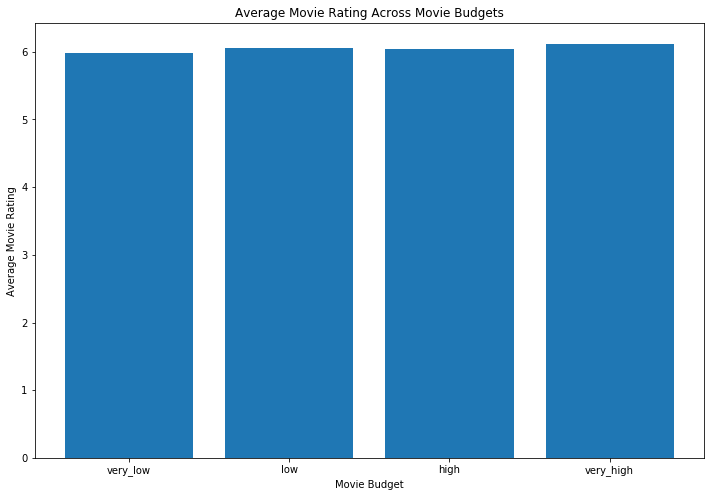

In [94]:
# Plotting bar chart for vote averages for each budget type

locations = [1, 2, 3, 4]
heights = vote_means
labels = ['very_low', 'low', 'high', 'very_high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Movie Rating Across Movie Budgets')
plt.xlabel('Movie Budget')
plt.ylabel('Average Movie Rating')

### Reasearch Question 2: Do higher budget movies tend to have increased popularity?

### A scatter plot view shows that there is a spike in popularity when it comes to approaching a certain budget.


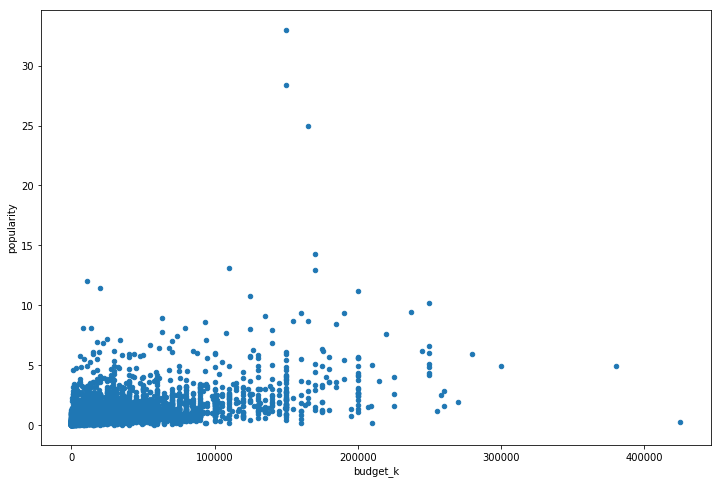

In [95]:
df.plot.scatter(x='budget_k', y='popularity')

### Following functions will create budget categories and popularity categories.  The purpose is to eventual calculate the proportions of popularity of types for each movie budget types.

In [96]:
# budget categorizing function

def categorize(num):
    mean = df['budget_k'].mean()
    if num < (mean * .5):
        return('very_low')
    elif num >= (mean * .5) and num < mean:
        return('low')
    elif num >= mean and num < (mean * 1.5):
        return('high')
    else:
        return('very_high')

# applying function to budget_k column
df['budget_category'] = df['budget_k'].apply(categorize)

In [97]:
# popularity categorizing function

def categorize2(num):
    mean = df['popularity'].mean()
    if num < (mean * .5):
        return('very_low')
    elif num >= (mean * .5) and num < mean:
        return('low')
    elif num >= mean and num < (mean * 1.5):
        return('high')
    else:
        return('very_high')

# applying function to popularity column
df['popularity_category'] = df['popularity'].apply(categorize2)

In [98]:
# viewing new columns
df.head()

,id,popularity,budget_k,original_title,vote_average,budget_category,popularity_category
0,135397,32.985763,150000.0,Jurassic World,6.5,very_high,very_high
1,76341,28.419936,150000.0,Mad Max: Fury Road,7.1,very_high,very_high
2,262500,13.112507,110000.0,Insurgent,6.3,very_high,very_high
3,140607,11.173104,200000.0,Star Wars: The Force Awakens,7.5,very_high,very_high
4,168259,9.335014,190000.0,Furious 7,7.3,very_high,very_high


In [99]:
# create counts for popularity types for each budget type and the total of each budget type

budget_counts = df.groupby(['budget_category',
                            'popularity_category']).count()['id']
budget_totals = df.groupby('budget_category').count()['popularity_category']

# calculting the proportiongs of popularity types for each budget type

very_low_proportions = budget_counts['very_low'] / budget_totals['very_low']
low_proportions = budget_counts['low'] / budget_totals['low']
high_proportions = budget_counts['high'] / budget_totals['high']
very_high_proportions = budget_counts['very_high'] / budget_totals['very_high']

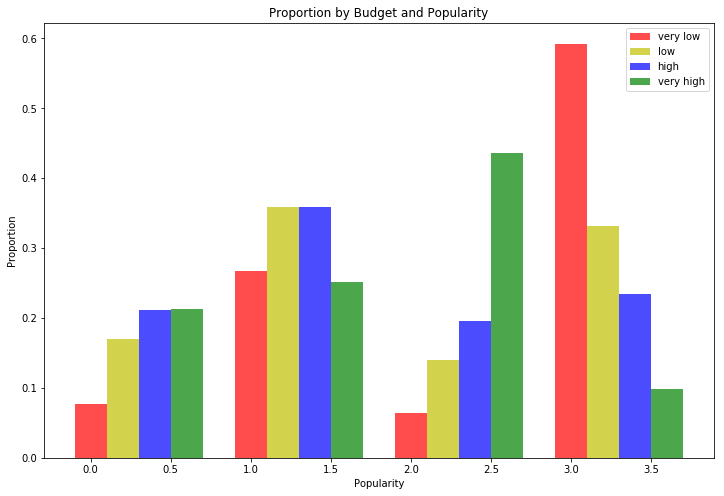

In [100]:
# plotting bar chart
ind1 = np.arange(len(very_low_proportions))
ind2 = np.arange(len(low_proportions))
ind3 = np.arange(len(high_proportions))
ind4 = np.arange(len(very_high_proportions))
width = 0.2

very_low_bars = plt.bar(ind1, very_low_proportions, width, color='r', alpha=.7, label='very low')
low_bars = plt.bar(ind2 + width, low_proportions, width, color='y', alpha=.7, label='low')
high_bars = plt.bar(ind3 + width + width, high_proportions, width, color='b', alpha=.7, label='high')
very_high_bars = plt.bar(ind4 + width + width + width, very_high_proportions, width, color='g', alpha=.7, label='very high')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Popularity')
plt.title('Proportion by Budget and Popularity')

# legend
plt.legend()

Bar chart shows the majority of the most popular movies belong to the very low budget movie categor

### Further 1-D analysis

### Most common movie popularity type

Text(0.5,1,'Counts of Popularity Type')

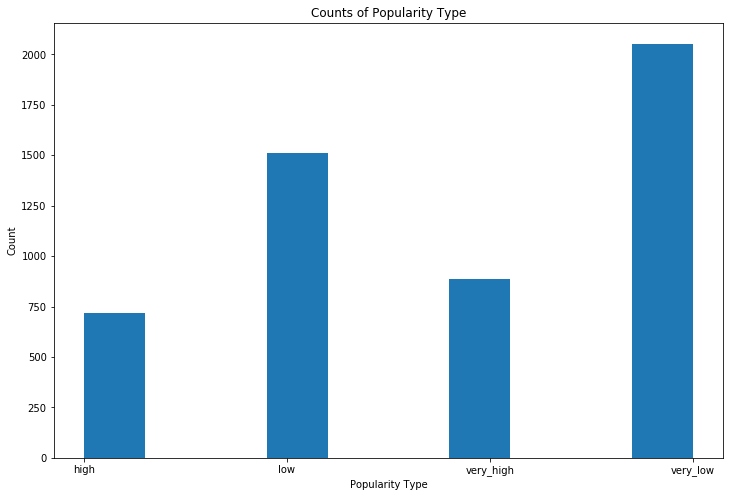

In [101]:
plt.hist(df['popularity_category'])
plt.ylabel('Count')
plt.xlabel('Popularity Type')
plt.title('Counts of Popularity Type')

### Most common budget type

Text(0.5,1,'Counts of Budget Type')

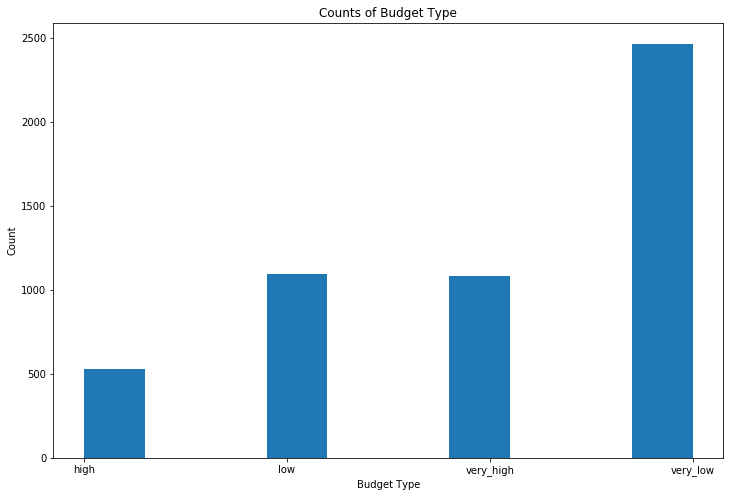

In [102]:
plt.hist(df['budget_category'])
plt.ylabel('Count')
plt.xlabel('Budget Type')
plt.title('Counts of Budget Type')

### Distribution of ratings

Text(0.5,1,'Distribution of Ratings')

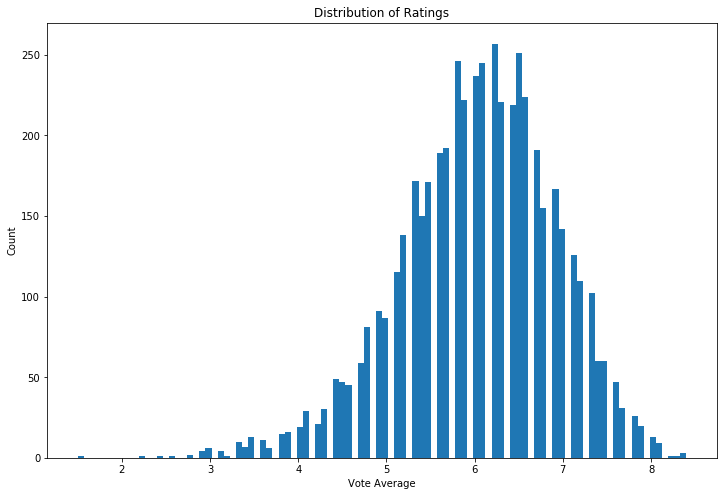

In [103]:
plt.hist(df['vote_average'], bins=100)
plt.ylabel('Count')
plt.xlabel('Vote Average')
plt.title('Distribution of Ratings')

<a id='conclusions'></a>
## Conclusions

In [104]:
df.head()

,id,popularity,budget_k,original_title,vote_average,budget_category,popularity_category
0,135397,32.985763,150000.0,Jurassic World,6.5,very_high,very_high
1,76341,28.419936,150000.0,Mad Max: Fury Road,7.1,very_high,very_high
2,262500,13.112507,110000.0,Insurgent,6.3,very_high,very_high
3,140607,11.173104,200000.0,Star Wars: The Force Awakens,7.5,very_high,very_high
4,168259,9.335014,190000.0,Furious 7,7.3,very_high,very_high


After examining the vote_average variable with the budget variable, it has been shown that a movie's budget is not a reliable indicator on whether the movie will be rated higher or not. As a result of examining the popularity variable along with the budget variable, it has been shown that most of the popular movies belong to the low budget category while the high budget category had the least most popular movies.

One weakness in this study is that there is an unequal amounts of low budget movies compared to higher budget movies. This would lead to the calculation of means of certain groups more reliable than others.  Another weakness in this study is that the movies included in this study were released over a time span of several decades therefore inflation could play a role in the categorizing of movies in terms of higher and lower budgets.  There were alot of movies in the dataset with a budget of zero which should have probably been entered in as null since it is very unlikely than any of movies in the data set had a budget of zero.  Another weakness in the data set was the improper formate of the release date column which should be formatted to datetime values of year/month/day.  Luckily I happen to conduct analysis that did not include the variable of date and time.